# Capturando de Epsódios com ou sem Crise

In [1]:
import pandas as pd
import numpy as np
import json


In [2]:
import os
from os.path import join, dirname
from dotenv import load_dotenv

dotenv_path = join(dirname('__file__'), '.env')

load_dotenv(dotenv_path)

DATALAKE_PATH = os.environ.get("DATALAKE_PATH")
ROOT_PATH = os.environ.get("ROOT_PATH")
SOURCE_PATH = os.environ.get("SOURCE_PATH")

fs = 512


In [3]:
infos = pd.read_json(f"{ROOT_PATH}/docs/infos.json")


In [4]:
itens = [item for sublist in infos[infos['ekg'] == 'yes']
         ['collections'].to_list() for item in sublist]


## Separando Períodos

- Normal (N): 60 seg antes do período Pré-ictal
- Pré-ictal (PE): 20 seg antes do período Ictal
- Ictal (I): Período total de crise
- Pós-ictal (PO): 20 seg após o período Ictal
- Recuperação (R): 60 seg após o período ictal

In [42]:
import matplotlib.pyplot as plt


def get_plot_ecg(df: pd.DataFrame, name: str, times: dict):
    fig = plt.figure(figsize=(16, 7))

    df.loc[times['normal']['start']:times['recuperacao']
           ['end'], 'EKGEKG'].plot(color='dimgray')

    plt.axvspan(times['ictal']['start'], times['ictal']
                ['end'], color='blue', alpha=0.1, label='Ictal')

    plt.axvspan(times['pre-ictal']['start'], times['pre-ictal']
                ['end'], color='orange', alpha=0.1, label='Pré-ictal')

    plt.axvspan(times['normal']['start'], times['normal']
                ['end'], color='green', alpha=0.1, label='Normal')

    plt.axvspan(times['pos-ictal']['start'], times['pos-ictal']
                ['end'], color='red', alpha=0.1, label='Pós-ictal')

    plt.axvspan(times['recuperacao']['start'], times['recuperacao']
                ['end'], color='purple', alpha=0.1, label='Recuperação')

    plt.xlabel('Amostras', fontdict={'size': 16, })
    plt.ylabel('mV', fontdict={'size': 16, })

    plt.xticks([])

    plt.title(name, fontdict={'weight': 'bold', 'size': 16, })

    plt.legend()

    plt.savefig(f"{ROOT_PATH}/reports/figures/ecg_periods/{name}.jpg")
    plt.savefig(f"{ROOT_PATH}/reports/figures/ecg_periods/{name}.eps")



def get_intervals(item: dict):
    times = {
        'ictal': {
            'start': item['seizure_start_sec'] * fs,
            'end': item['seizure_end_sec'] * fs
        },
        'pre-ictal': {
            'start': (item['seizure_start_sec'] * fs) - (20*fs),
            'end': item['seizure_start_sec'] * fs

        },
        'pos-ictal': {
            'start': item['seizure_end_sec'] * fs,
            'end': (item['seizure_end_sec'] * fs) + (20*fs)
        },
        'normal': {
            'start': (item['seizure_start_sec'] * fs) - (80*fs),
            'end': (item['seizure_start_sec'] * fs) - (20*fs)

        },
        'recuperacao': {
            'start': (item['seizure_end_sec'] * fs) + (20*fs),
            'end': (item['seizure_end_sec'] * fs) + (80*fs)
        }
    }

    return times


## Pipeline ECG

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


PN05-4
PN05-4


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


PN06-3


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

PN10-10


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


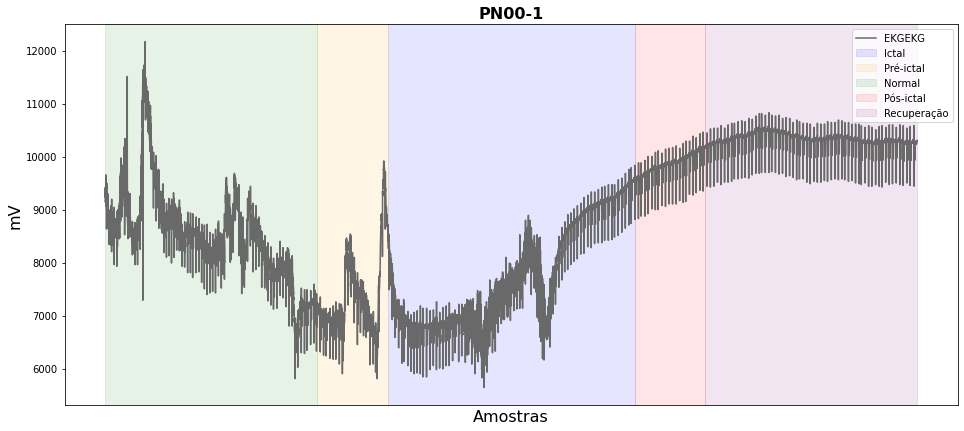

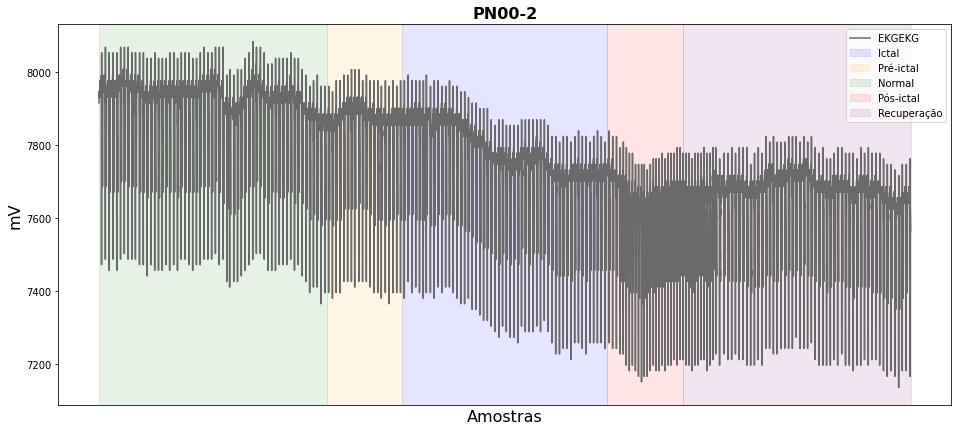

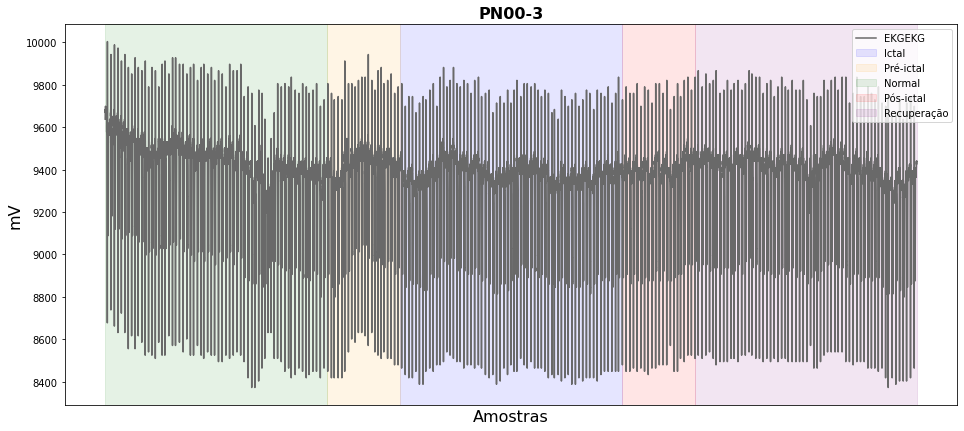

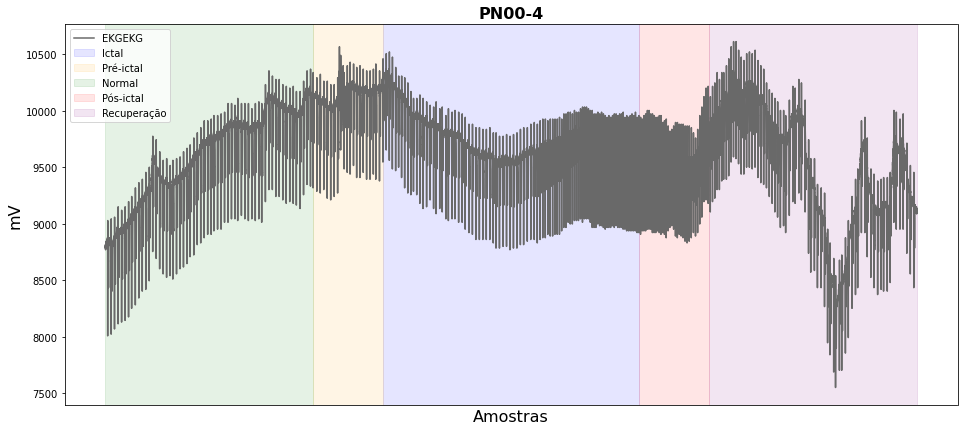

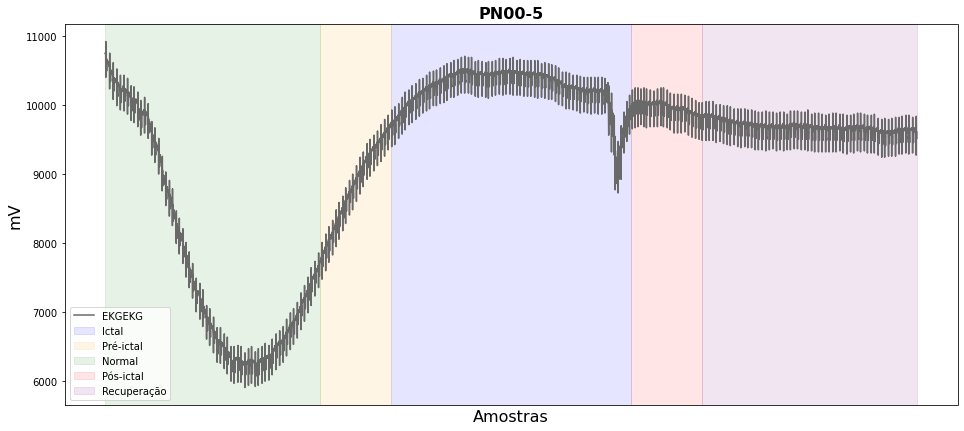

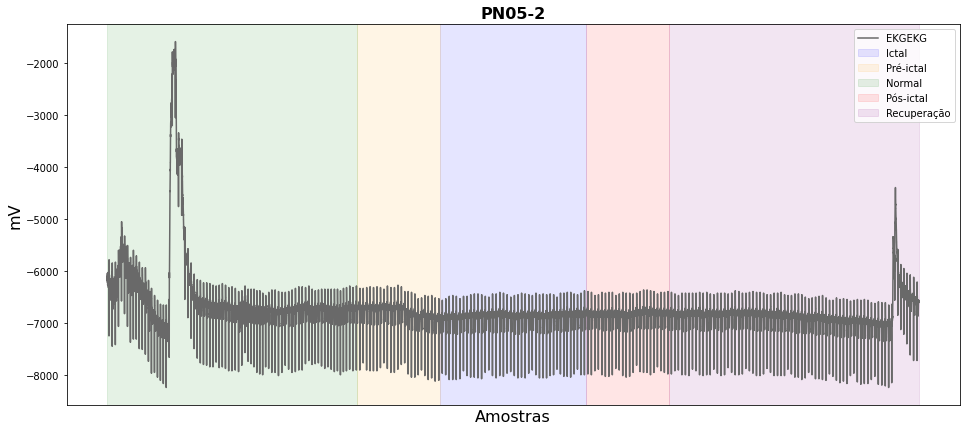

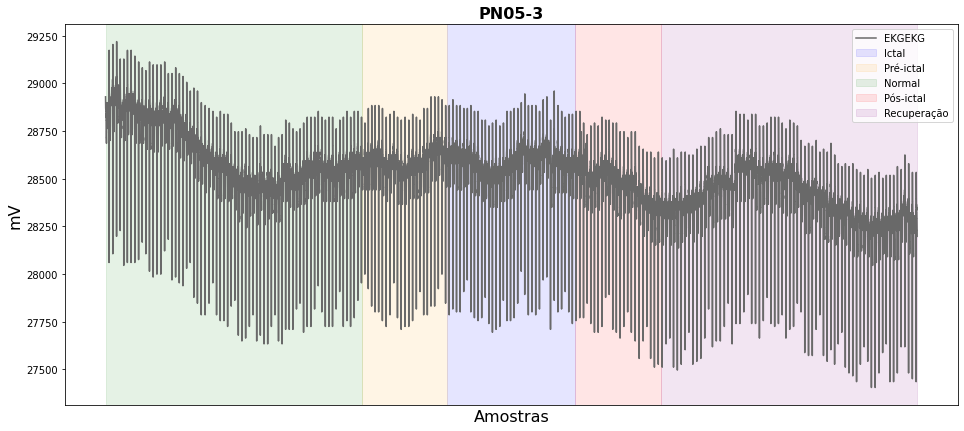

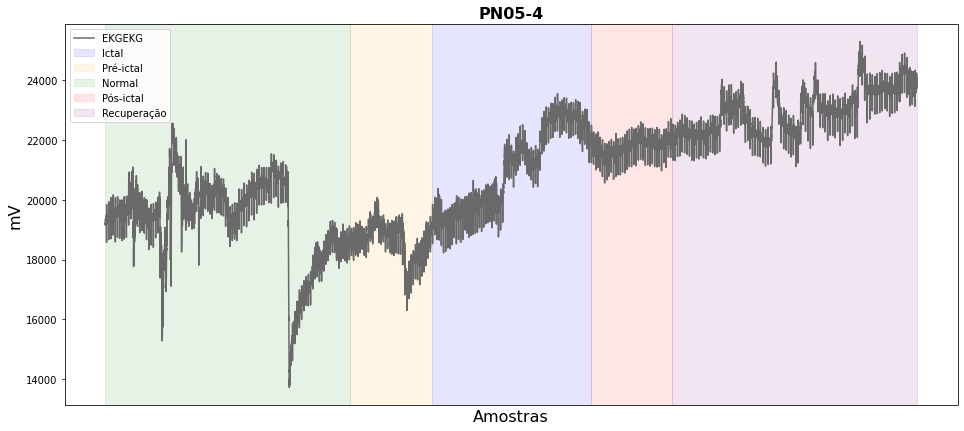

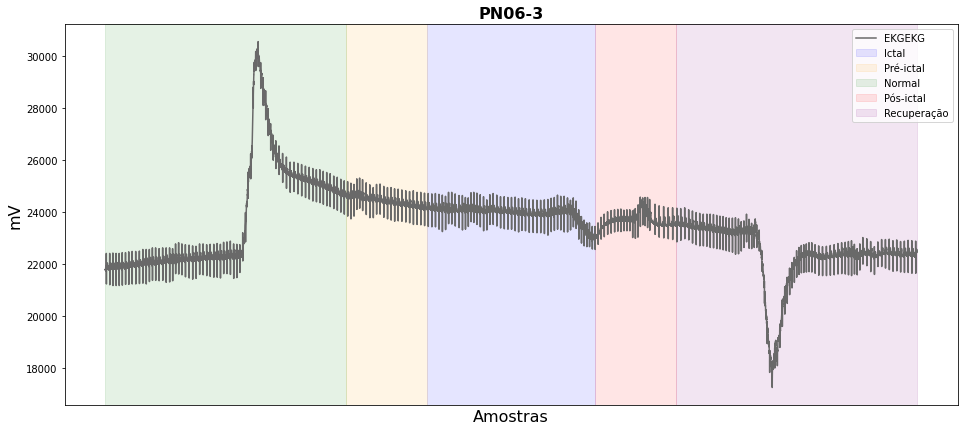

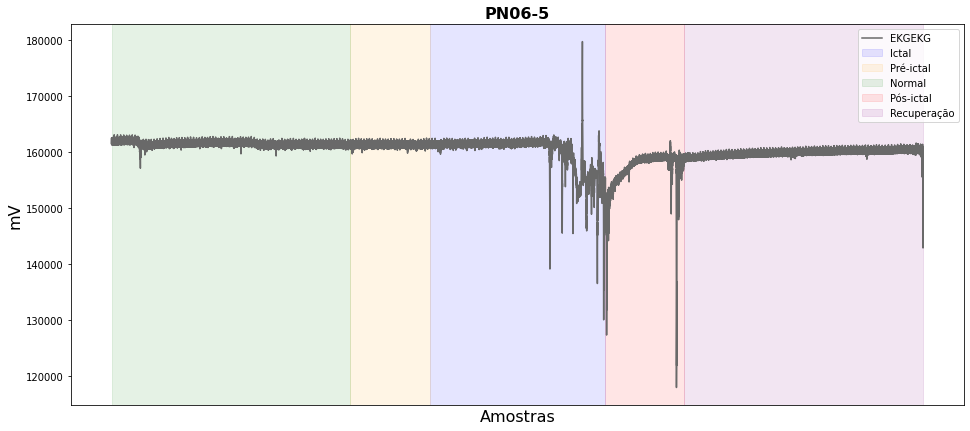

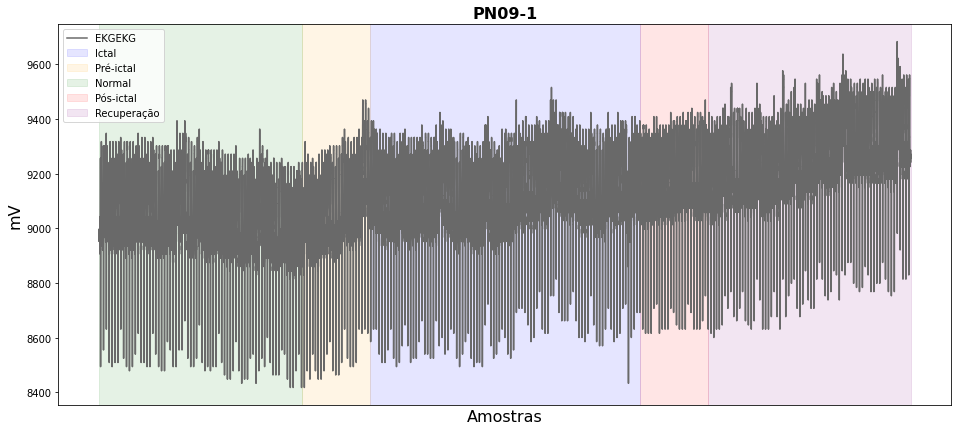

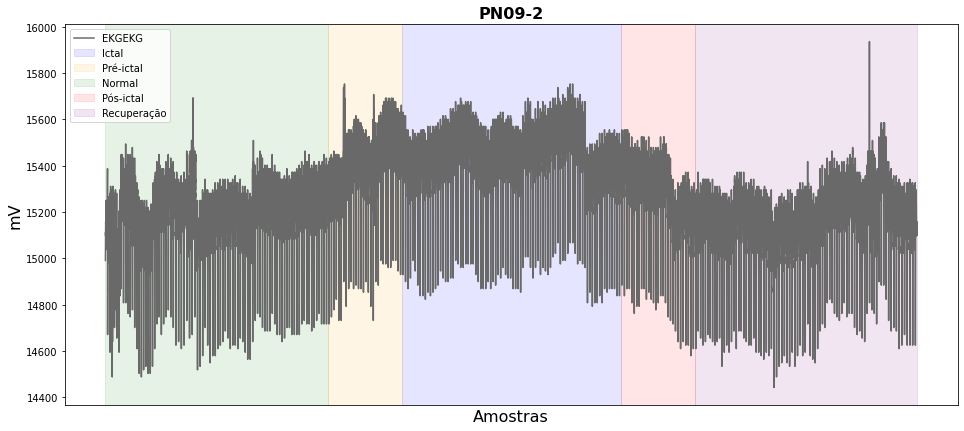

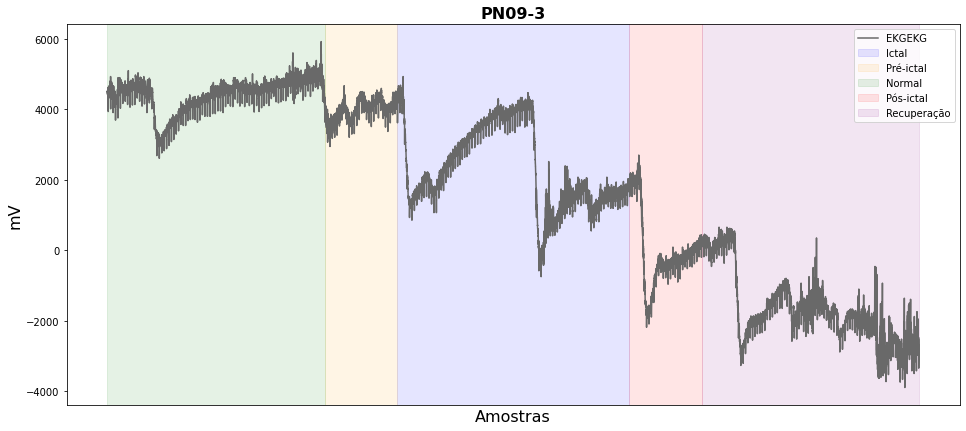

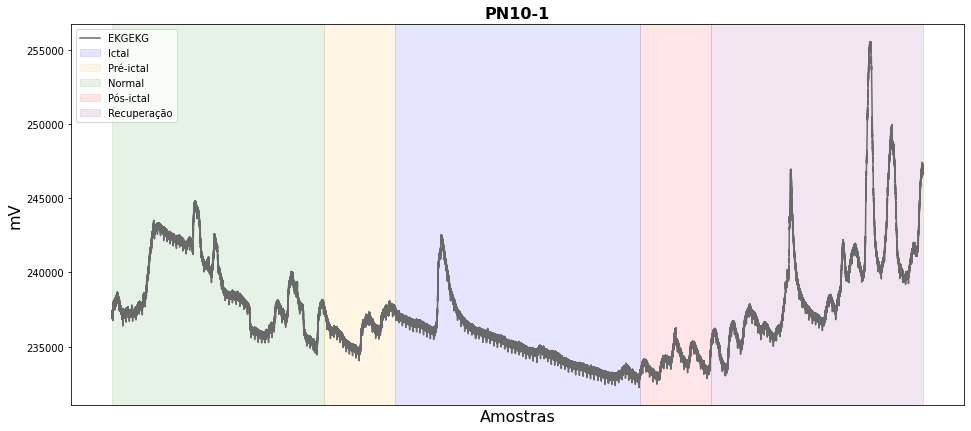

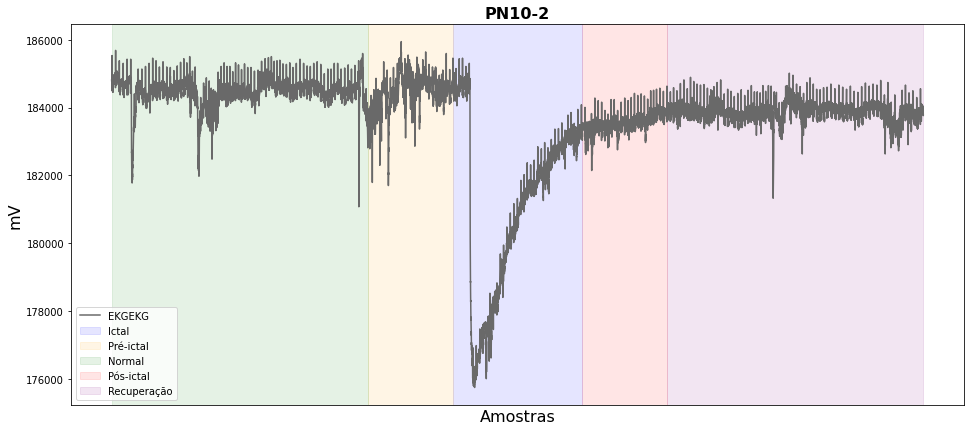

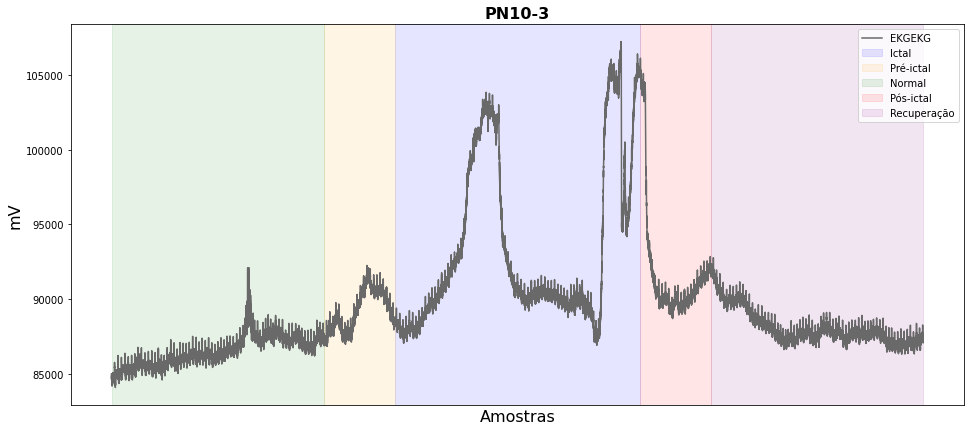

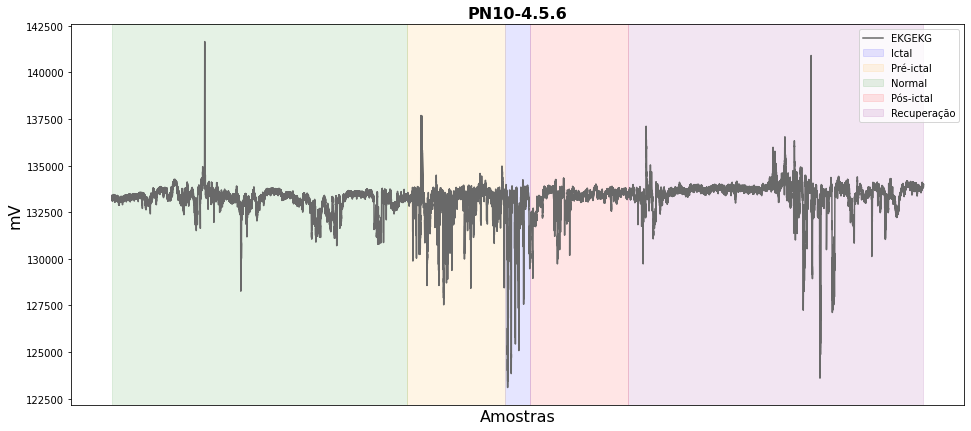

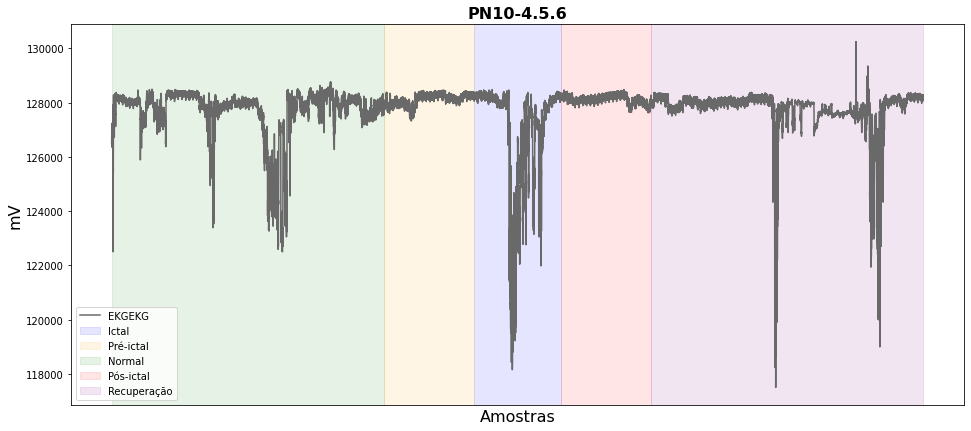

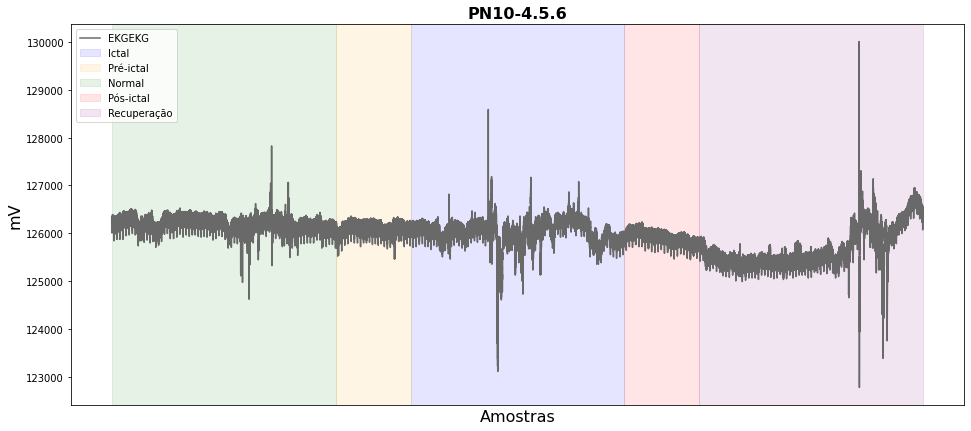

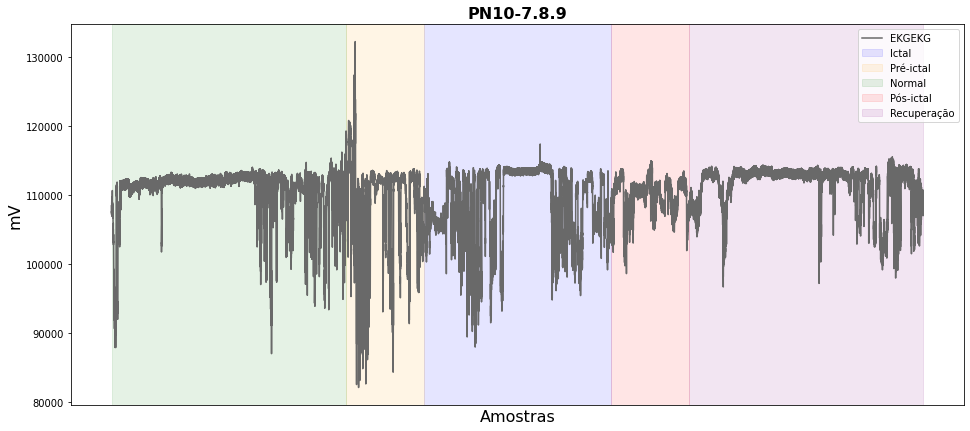

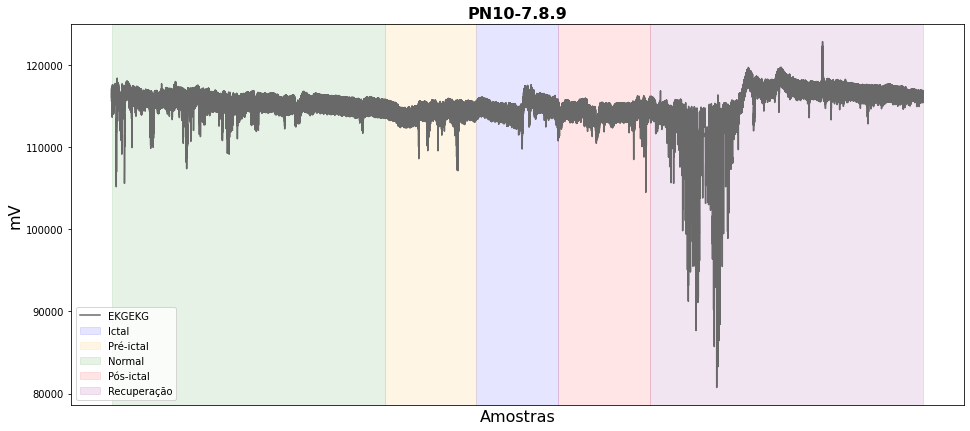

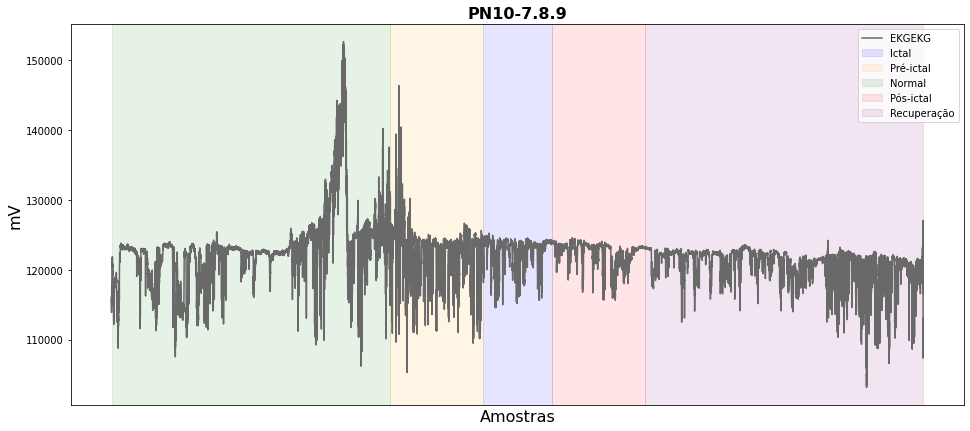

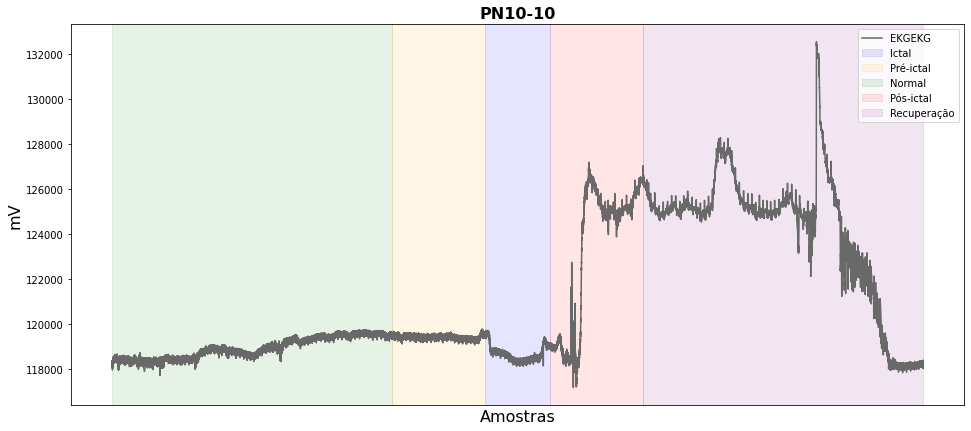

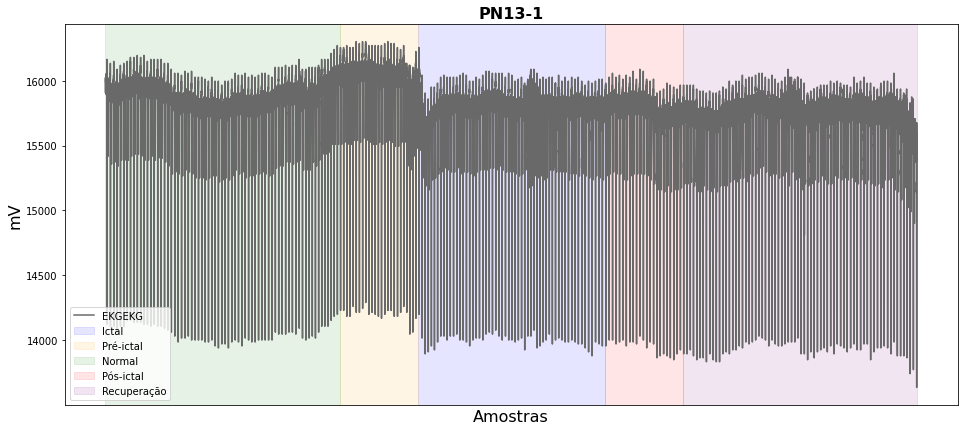

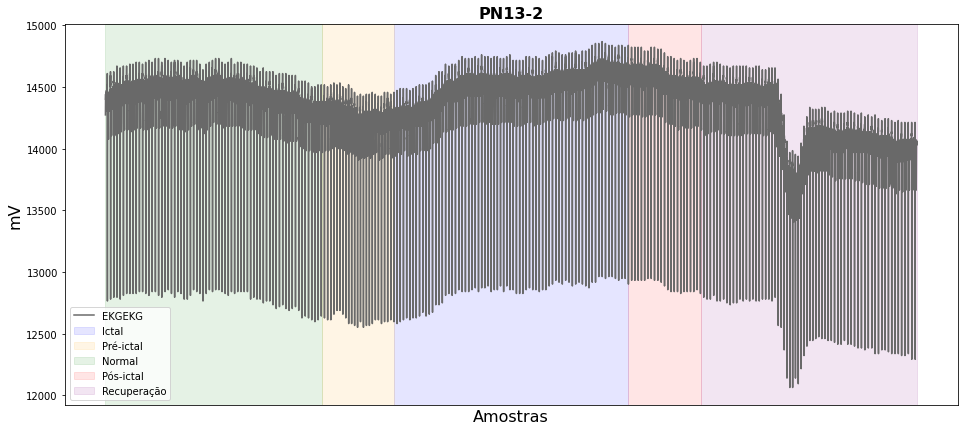

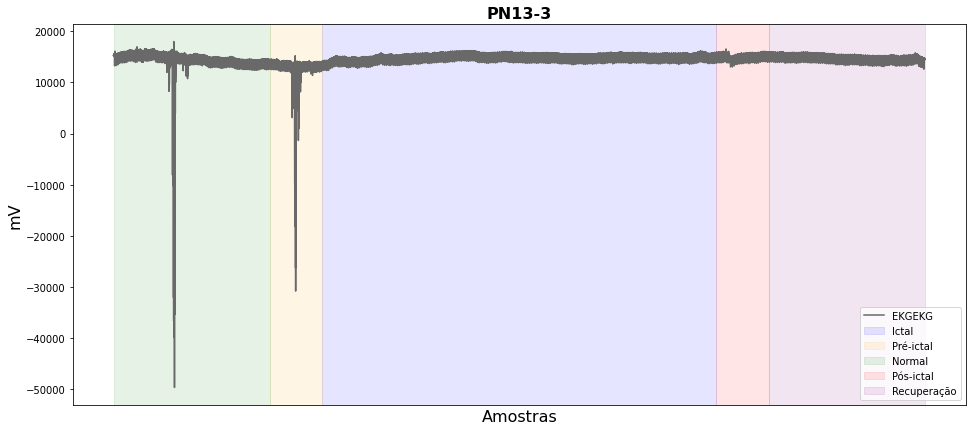

In [43]:
for item in itens:
    try:
        file = f"{DATALAKE_PATH}/siena/raw/ecg/{item['name'].replace('edf','parquet')}"
        
        df = pd.read_parquet(file)

        times = get_intervals(item)

        name = item['name'].replace('.edf','')

        for key in times.keys():
            path = f"{DATALAKE_PATH}/siena/raw/periods/ecg/{key}/{name}.parquet"
            df.loc[times[key]['start']: times[key]['end'],:].to_parquet(path)
        
        get_plot_ecg(df=df, name=name, times=times)
        
    except FileNotFoundError:
        print(name)
        continue
        